In [24]:
# Source code
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from PIL import Image, ExifTags

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Problem Statement

>### The project is aimed to detect Cancer with small pathology images. It is going to use CNN approach to train and predict the data.
>### There are 220025 images in training data using about 3.4MB. The images are labeled to either 0 or 1 referring their catergory (negative or positive result). 130908 are negative and 89117 are positive. and there seems to be no null entries. Since the test set is not labeled. 5% of each negative and positive cases in training set will be selected for validation. 
>### Each data is around 28kB file size. It is Tiff image file image with 96x96 pixel in RGB.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB
None


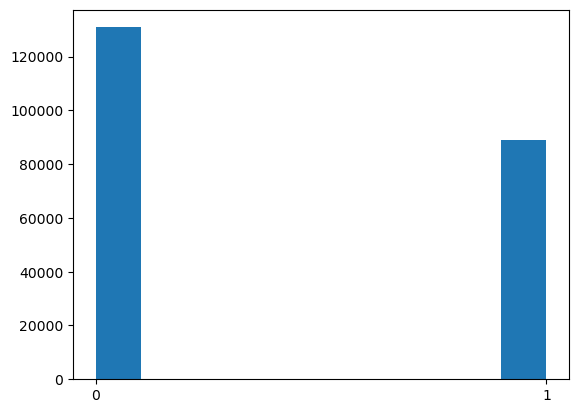

Image Meta Data: <PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=96x96 at 0x7B4CD9E38F10>


In [35]:
dir_images_test = '/kaggle/input/histopathologic-cancer-detection/test/'
dir_images_train = '/kaggle/input/histopathologic-cancer-detection/train/'
labels_train = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')
images_train = labels_train
images_train['label'] = images_train['label'].astype(str)
images_train['id'] = labels_train['id'] + '.tif'
print(labels_train.info())
plt.hist(images_train['label'])
plt.show()
pd.Series(images_train['label']).value_counts()
imageData = Image.open(dir_images_train+images_train['id'][0])
print("Image Meta Data:", imageData)

# 2. Exploratory Data Analysis (EDA) 
> ### We could find that the images have various patterns. We could find points, edges and space area in the data. Majority are having intensive points. Some of them have a large space area. Few of them mainly contains edges and big points.

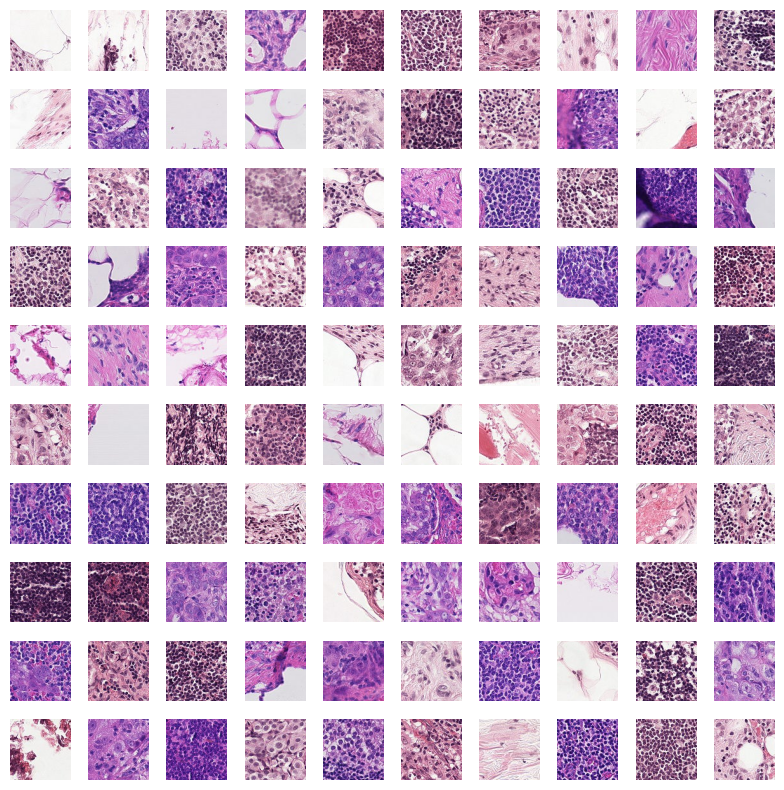

In [20]:
from tifffile import imread
rows, cols = 10, 10

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i in range(10 * 10):
    image = imread(dir_images_train + images_train['id'][i])

    row, col = i // cols, i % cols

    axes[row, col].imshow(image)
    axes[row, col].axis('off')

plt.subplots_adjust(wspace = 0.1, hspace = 0.3)

plt.show()

> ### The first model is as follows:
> ### Conv2D -> Conv2D -> MaxPool2D -> Conv2D -> Conv2D -> MaxPool2D -> Flatten -> Dense -> Dense -> Output

> ### It is going to use ReLU as the activation function for the output layer, since it has better converagnece, less computation and fitted to binary detection.

> ### The second model is as follows:
> ### Conv2D -> Conv2D -> MaxPool2D -> Conv2D -> Conv2D -> MaxPool2D -> Flatten -> Dense -> Dense -> Output

> ### It is going to use ReLU as the activation function for the output layer, since it has better converagnece, less computation and fitted to binary detection.

In [ ]:
# 4. Results and Analysis 

> ### Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.

> ### Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

In [ ]:
# 5. Conclusion 

> ### Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?